# Generate a LRG Catalog in Redshift Space

In [2]:
import time
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
root =  '/global/cscratch1/sd/jiaxi/master/'
path = root+'catalog/0211_LRG_real/'
out =  root+'catalog/0211_LRG_redshift/'

In [ ]:
time_start=time.time()
org = Table.read(path+'LRGorg.dat',format="ascii")
scat= Table.read(path+'LRGscat.dat',format="ascii")
scat1= Table.read(path+'LRGscat1.dat',format="ascii")
scat2= Table.read(path+'LRGscat2.dat',format="ascii")
scat3= Table.read(path+'LRGscat3.dat',format="ascii")
time_end=time.time()
print('time cost',time_end-time_start,'s')

Convert the catalogue in the comoving space (x,y,$z_real$) into a redshift space (x,y,$z_{redshift}$) means we consider the Redhift Space Distortion (RSD) brought by the peculiar velocity of the galaxy. We consider an observer in infinite and the line of sight for all the galaxies is z direction. So $z_{redshift}=z+\Delta z$, where $\Delta z$ is the displacement caused by RSD.
\begin{equation}
\Delta z = v_z(1+Z)/H(Z)
\end{equation}
\begin{equation}
H^2(Z)=H_0^2\times (\Omega_m(1+Z)^3+\Omega_{\Lambda})
\end{equation}
where $Z=0.56$ is the redshift, $H_0^2=100h$, $\Omega_m=0.307$, $\Omega_{\Lambda}=1-\Omega_m$, $\Omega_{\gamma}=0=\Omega_k$.


In [22]:
time_start=time.time()
z=0.56 # simulation redshift
Om=0.307 
Ode = 1-Om
H = 100*np.sqrt(Om*(1+z)**3+Ode)
for data,name in zip([org,scat,scat1,scat2,scat3],['org','scat','scat1','scat2','scat3']):
    z_redshift = np.copy(data)
    z_redshift['z']  = (data['z']+data['vz']*(1+z)/H)
    z_redshift['z'] %=2500
    ascii.write(z_redshift,out+"LRG"+name+"red.dat", delimiter='\t')
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 214.05047369003296 s


## 2PCF Differece

In [52]:
cfpath =  root+'2PCFout/0213_LRG_redshift/'
cfpath1 =  root+'2PCFout/0211_LRG_real/'

In [53]:
orgred = Table.read(cfpath+'LRGorgred.dat',format="ascii")
scatred= Table.read(cfpath+'LRGscatred.dat',format="ascii")
scat1red= Table.read(cfpath+'LRGscat1red.dat',format="ascii")
scat2red= Table.read(cfpath+'LRGscat2red.dat',format="ascii")
scat3red= Table.read(cfpath+'LRGscat3red.dat',format="ascii")

In [40]:
org = Table.read(cfpath1+'LRGorg.dat',format="ascii")
scat= Table.read(cfpath1+'LRGscat.dat',format="ascii")
scat1= Table.read(cfpath1+'LRGscat1.dat',format="ascii")
scat2= Table.read(cfpath1+'LRGscat2.dat',format="ascii")
scat3= Table.read(cfpath1+'LRGscat3.dat',format="ascii")

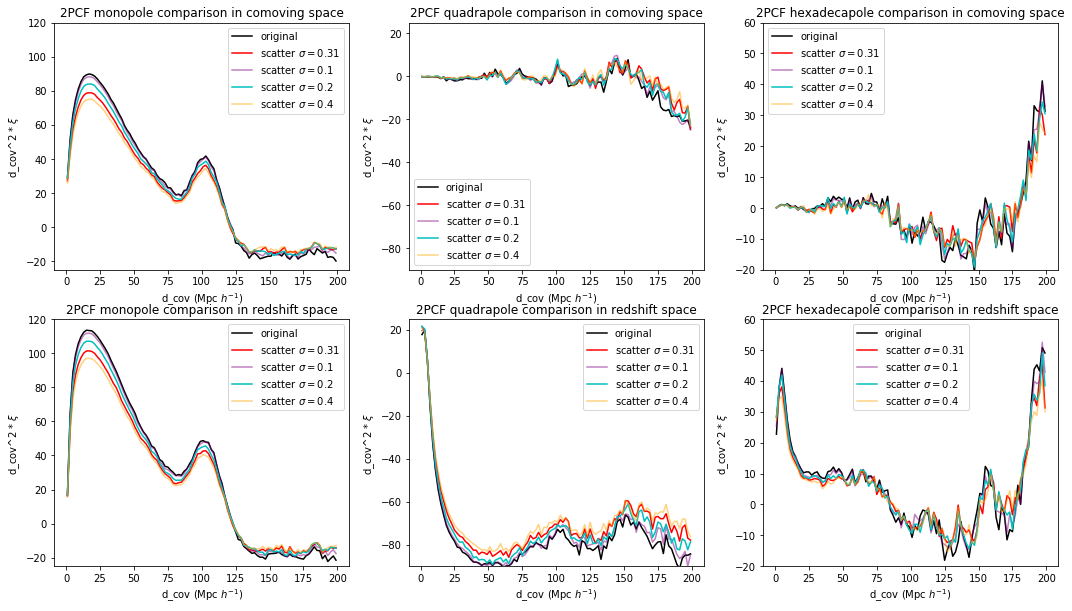

In [38]:
# 0209
fig=plt.figure(figsize=(18,10))
for i,j,name in zip(['col2','col3','col4'],range(3),['monopole','quadrapole','hexadecapole']):
    ax = plt.subplot2grid((2,3),(0,j))
    ax.plot(org['col1'],org['col1']**2*org[i],c='k',label='original')
    ax.plot(scat['col1'],scat['col1']**2*scat[i],c='r',label='scatter $\sigma=0.31$')
    ax.plot(scat1['col1'],scat1['col1']**2*scat1[i],c='purple',alpha=0.5,label='scatter $\sigma=0.1$')
    ax.plot(scat2['col1'],scat2['col1']**2*scat2[i],c='c',label='scatter $\sigma=0.2$')
    ax.plot(scat3['col1'],scat3['col1']**2*scat3[i],c='orange',alpha=0.5,label='scatter $\sigma=0.4$')
    plt.legend(loc=0)
    plt.xlabel('d_cov (Mpc $h^{-1}$)')
    plt.ylabel('d_cov^2 * $\\xi$')
    plt.title('2PCF '+name+' comparison in comoving space')
    if j==0:
        ax.set_ylim(-25,120)
    if j==1:
        ax.set_ylim(-90,25)
    if j==2:
        ax.set_ylim(-20,60)
        
    ax = plt.subplot2grid((2,3),(1,j))
    ax.plot(orgred['col1'],orgred['col1']**2*orgred[i],c='k',label='original')
    ax.plot(scatred['col1'],scatred['col1']**2*scatred[i],c='r',label='scatter $\sigma=0.31$')
    ax.plot(scat1red['col1'],scat1red['col1']**2*scat1red[i],c='purple',alpha=0.5,label='scatter $\sigma=0.1$')
    ax.plot(scat2red['col1'],scat2red['col1']**2*scat2red[i],c='c',label='scatter $\sigma=0.2$')
    ax.plot(scat3red['col1'],scat3red['col1']**2*scat3red[i],c='orange',alpha=0.5,label='scatter $\sigma=0.4$')
    plt.legend(loc=0)
    plt.xlabel('d_cov (Mpc $h^{-1}$)')
    plt.ylabel('d_cov^2 * $\\xi$')
    plt.title('2PCF '+name+' comparison in redshift space')
    if j==0:
        ax.set_ylim(-25,120)
    if j==1:
        ax.set_ylim(-90,25)
    if j==2:
        ax.set_ylim(-20,60)
plt.savefig(root+'plots/RSDeffect.png',bbox_tight=True)

Moving to the redshift space generates non-zero quadrupole (negative) and hexadecapole. This is due to the redshift space distortion that is caused by the peculiar velocities of the galaxies. By considering the velocity-density and velocity-velocity correlation, the signals in redshift space are stronger than those in real space. We could also recognise the BAO in monopole and quadrupole. 

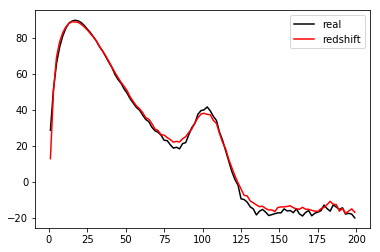

In [21]:
fig,ax=plt.subplots()
ax.plot(org['col1'],org['col1']**2*org['col2'],c='k',label='real')
ax.plot(orgred['col1'],orgred['col1']**2*orgred['col2']/1.275,c='r',label='redshift')
plt.legend(loc=1)

Due to the RSD, the monopole conponents are squeezed along the line of sight in linear regime. If I have a circle in real space, it will become an ellipse in redshift space. This effect will weaken the BAO signal in monopole as been shown above. 

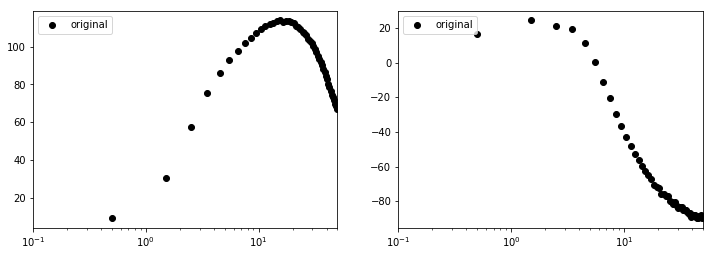

In [56]:
fig = plt.figure(figsize=(12,4))
for i,j in zip(['col2','col3'],range(2)):
    ax=plt.subplot2grid((1,2),(0,j))
    ax.scatter(orgred['col1'],orgred['col1']**2*orgred[i],c='k',label='original')
    plt.legend(loc=2)
    plt.xlim(0.1,50)
    plt.xscale('log')
    

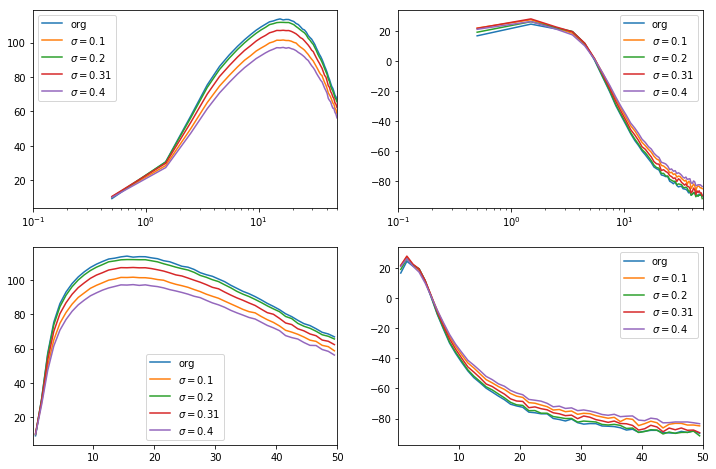

In [63]:
fig = plt.figure(figsize=(12,8))
for k in range(2):
    for i,j in zip(['col2','col3'],range(2)):
        ax=plt.subplot2grid((2,2),(k,j))
        for data in [orgred,scatred,scat1red,scat2red,scat3red]:
                ax.plot(data['col1'],data['col1']**2*data[i])
        label=['org','$\sigma=0.1$','$\sigma=0.2$','$\sigma=0.31$','$\sigma=0.4$']
        plt.legend(label,loc=0)
        plt.xlim(0.1,50)
        if k==0:
            plt.xscale('log')

As in real space, larger scattering parameter present larger monopole (positive) and smaller quadrupole (negative) signals in redshift space in $d_{com}<50 Mpc$ $h^{-1}$. 

In [64]:
data['col1']

0.5
1.5
2.5
3.5
4.5
5.5
6.5
7.5
8.5
9.5
10.5
